In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
import os
import pandas as pd

# The folder path where 21 files are stored (use raw string r for the Windows path)
folder_path = r'C:\Users\patil\Downloads\ECOMERCE DATASET FOR PROJECT'

# Empty list to store each CSV's data
all_file_data = []

# Loop through each file in the folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        full_path = os.path.join(folder_path, file)
        df = pd.read_csv(full_path)

        # Extract category from filename (assuming it's the 3rd part of the name)
        category = file.split('-')[2].replace('.csv', '')
        df['category'] = category

        all_file_data.append(df)

# Combine all data into a single DataFrame
combined_df = pd.concat(all_file_data, ignore_index=True)

# Save combined data to a CSV file
combined_df.to_csv('combined_ecommerce_with_category.csv', index=False)
print("Combine complete. Total rows& column:", combined_df.shape)


Combine complete. Total rows& column: (82105, 13)


In [3]:
#information of combine files
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82105 entries, 0 to 82104
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goods-title-link--jump        664 non-null    object 
 1   goods-title-link--jump href   664 non-null    object 
 2   rank-title                    14605 non-null  object 
 3   rank-sub                      14605 non-null  object 
 4   price                         82103 non-null  object 
 5   discount                      54977 non-null  object 
 6   selling_proposition           54364 non-null  object 
 7   goods-title-link              81427 non-null  object 
 8   category                      82105 non-null  object 
 9   color-count                   19743 non-null  float64
 10  blackfridaybelts-bg src       3791 non-null   object 
 11  blackfridaybelts-content      3791 non-null   object 
 12  product-locatelabels-img src  3622 non-null   object 
dtypes

In [4]:
#check duplicates
combined_df.duplicated().sum()

np.int64(2876)

In [5]:
combined_df.drop_duplicates(inplace=True)

In [6]:
#checking missing value
combined_df.isnull().sum()

goods-title-link--jump          78565
goods-title-link--jump href     78565
rank-title                      64951
rank-sub                        64951
price                               2
discount                        26234
selling_proposition             26720
goods-title-link                  678
category                            0
color-count                     60306
blackfridaybelts-bg src         75553
blackfridaybelts-content        75553
product-locatelabels-img src    75894
dtype: int64

In [8]:
#drop all unwanted column in dataframe
combined_df.drop(columns=['goods-title-link--jump',
                          'goods-title-link--jump href',
                          'rank-title','rank-sub','color-count',
                          'blackfridaybelts-bg src',
                          'product-locatelabels-img src',
                          'blackfridaybelts-content'],inplace=True) 

In [9]:
combined_df.isnull().sum()

price                      2
discount               26234
selling_proposition    26720
goods-title-link         678
category                   0
dtype: int64

In [10]:
#check the datatype of 'price'
combined_df['price'].dtype

dtype('O')

In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79229 entries, 0 to 82104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                79227 non-null  object
 1   discount             52995 non-null  object
 2   selling_proposition  52509 non-null  object
 3   goods-title-link     78551 non-null  object
 4   category             79229 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


In [12]:
combined_df['price'] = (
    combined_df['price']
    .str.replace('$', '', regex=False)     # replace dollar singn
    .str.replace(',', '', regex=False)     # replace comma
    .astype(float)                         #  convert into float
)


In [13]:
combined_df['discount'] = (
    combined_df['discount']
    .fillna('0')                             # cover null into string
    .str.replace('%', '', regex=False)      # remov '%' 
    .str.replace('-', '', regex=False)      # remove'-' 
    .astype(float)                          # convert into Float
)


In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79229 entries, 0 to 82104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                79227 non-null  float64
 1   discount             79229 non-null  float64
 2   selling_proposition  52509 non-null  object 
 3   goods-title-link     78551 non-null  object 
 4   category             79229 non-null  object 
dtypes: float64(2), object(3)
memory usage: 3.6+ MB


In [16]:
combined_df.isnull().sum()

price                      2
discount                   0
selling_proposition    26720
goods-title-link         678
category                   0
dtype: int64

In [21]:
#remove missing values
combined_df.dropna(subset=['price','selling_proposition','goods-title-link'],inplace=True)

In [18]:
combined_df.isnull().sum()

price                  0
discount               0
selling_proposition    0
goods-title-link       0
category               0
dtype: int64

In [19]:
combined_df['selling_proposition']

49        100+ sold recently
51         10+ sold recently
53        400+ sold recently
58         20+ sold recently
61        200+ sold recently
                ...         
82097    8.2k+ sold recently
82098     100+ sold recently
82099     100+ sold recently
82101      10+ sold recently
82102     200+ sold recently
Name: selling_proposition, Length: 52168, dtype: object

In [20]:
#create new column selling_count
combined_df['selling_count'] = (
    combined_df['selling_proposition']              
    .fillna('0')
    .str.replace('sold recently', '', regex=False)
    .str.replace('+', '', regex=False)
    .str.replace('k', '000', regex=False)
    .str.strip()
    .astype(float)
)


In [22]:
#drop unwanted column
combined_df.drop('selling_proposition', axis=1, inplace=True)


In [35]:
combined_df

,price,discount,goods-title-link,category,selling_count
49,2.95,16.0,New Mini Nail Lamp Portable Led Uv Lamp Usb Na...,appliances,100.0
51,5.31,44.0,"1pc Smart Stainless Steel Mug With Mixing Rod,...",appliances,10.0
53,6.37,41.0,"USB Rechargeable Electric Milk Frother, Powerf...",appliances,400.0
58,1.56,71.0,1pc 500ml/1000ml Clear Milk Carton Water Bottl...,appliances,20.0
61,2.90,0.0,1pc Black Baking Tray With Special Barbecue De...,appliances,200.0
...,...,...,...,...,...
82097,4.25,7.0,SHEIN Swim Summer Beach High Cut Bikini Panty,womens_clothing,8.2
82098,20.39,0.0,SHEIN Pregnant Women's Plaid Simple Daily Dress,womens_clothing,100.0
82099,13.49,0.0,"SHEIN Frenchy Summer Women's Shorts, Women's, ...",womens_clothing,100.0
82101,42.49,0.0,Elegant And Stylish Patchwork Lace Cheongsam D...,womens_clothing,10.0


In [30]:
#maximum price
combined_df['price'].max()

np.float64(899.99)

In [31]:
#min price
combined_df['price'].min()

np.float64(0.15)

In [32]:
#max selling_count
combined_df['selling_count'].max()

np.float64(10000.0)

In [33]:
#min selling_count
combined_df['selling_count'].min()

np.float64(1.0)

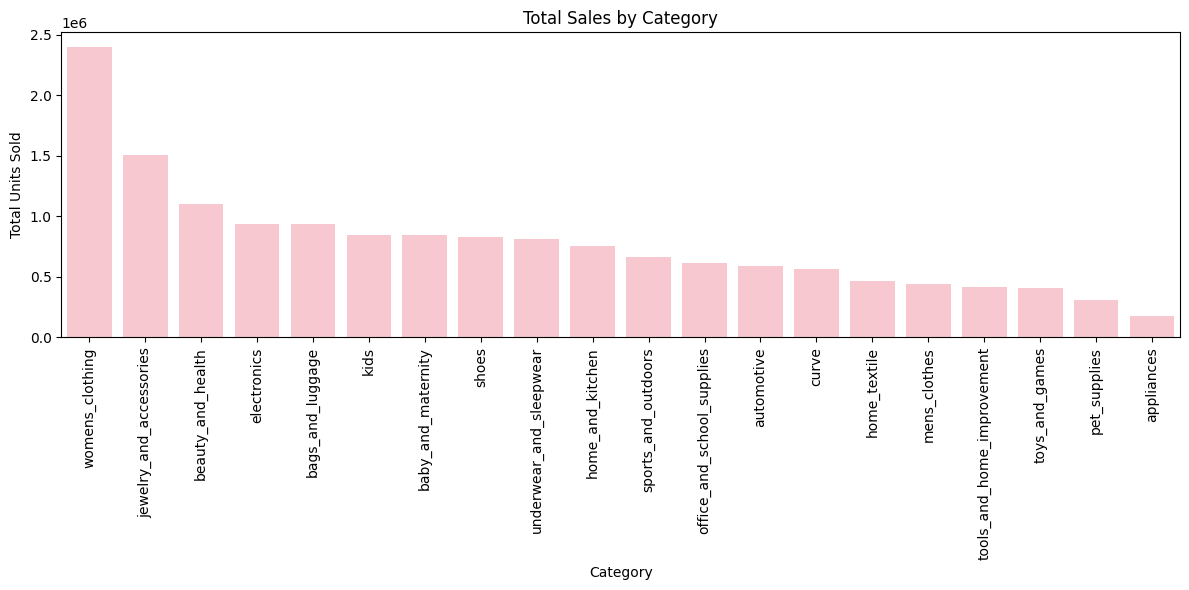

In [57]:
#Total Sales by Category
#Goal: Find out which categories are performing the best.
category_sales = combined_df.groupby('category')['selling_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=category_sales.index, y=category_sales.values,color='pink')

plt.xticks(rotation=90)
plt.title("Total Sales by Category")
plt.ylabel("Total Units Sold")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


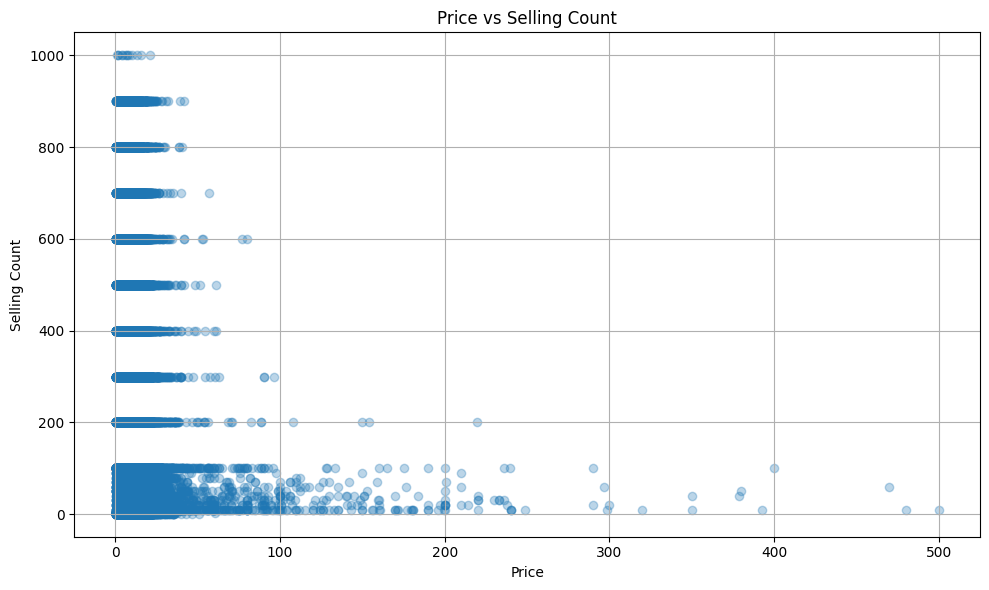

In [46]:
#Price vs Selling Count (Does higher price reduce sales?)
#Goal: Understand if expensive products sell less.
filtered_df = combined_df[(combined_df['price'] <= 500) & (combined_df['selling_count'] <= 1000)]

plt.figure(figsize=(10,6))
plt.scatter(filtered_df['price'], filtered_df['selling_count'], alpha=0.3)
plt.title("Price vs Selling Count")
plt.xlabel("Price")
plt.ylabel("Selling Count")
plt.grid(True)
plt.tight_layout()
plt.show()


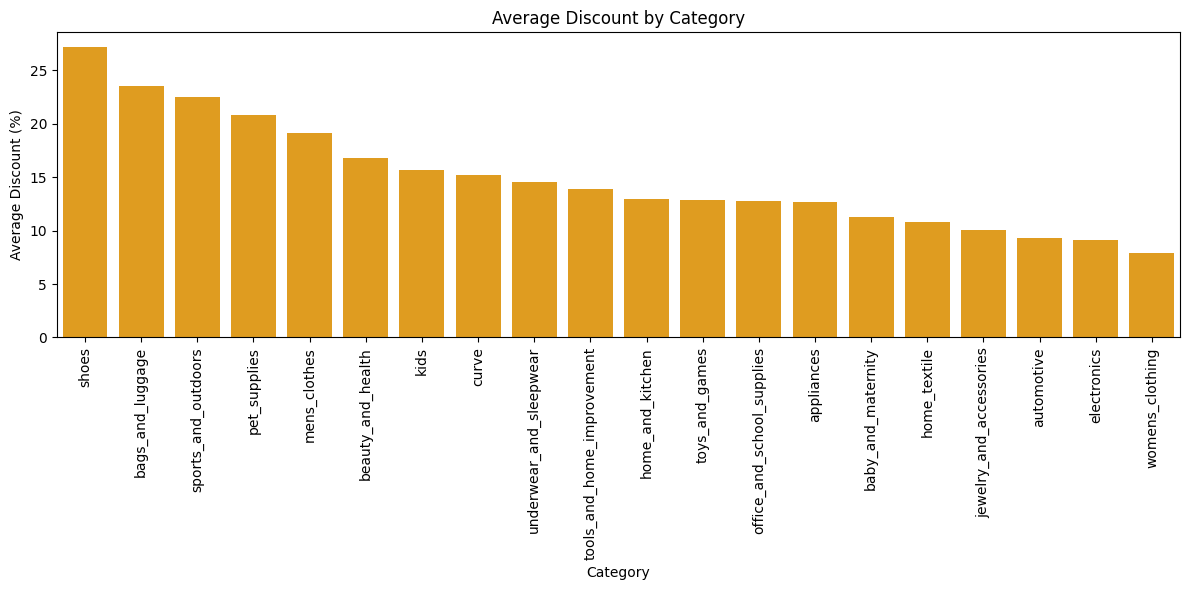

In [56]:
#Category-wise Discount
#Goal: See which categories are offering the most discounts.
category_discount = combined_df.groupby('category')['discount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=category_discount.index, y=category_discount.values, color='orange')
plt.xticks(rotation=90)
plt.title("Average Discount by Category")
plt.ylabel("Average Discount (%)")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


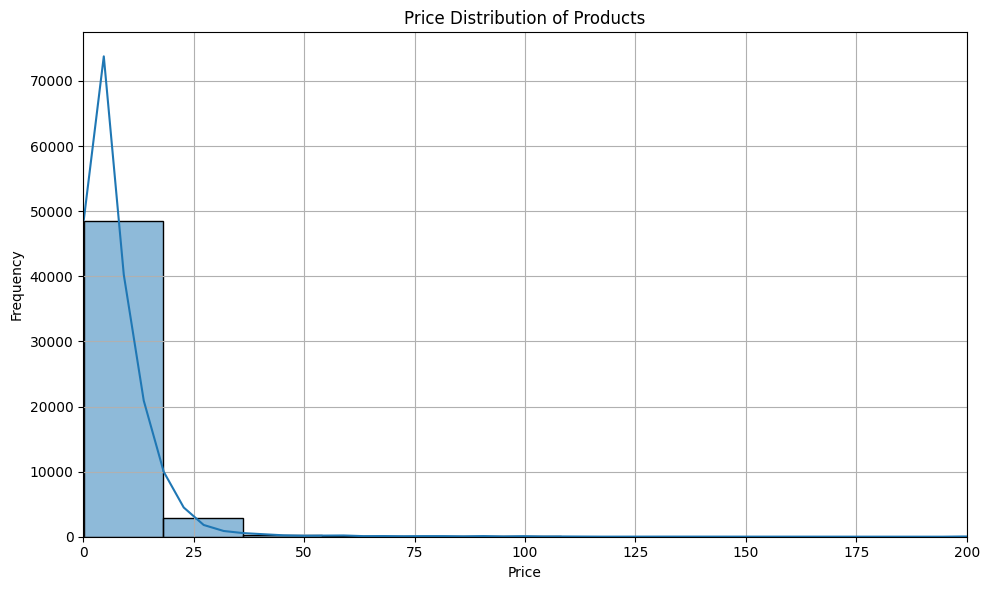

In [48]:
#Price Distribution (Ideal price range)
#Goal: See what price range most products fall into.
plt.figure(figsize=(10,6))
sns.histplot(combined_df['price'], bins=50, kde=True)
plt.title("Price Distribution of Products")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 200)  # Zoom in for clarity
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
#To save clean csv
combined_df.to_csv('cleaned_ecommerce_data.csv', index=False)
print("succesfully saved")

succesfully saved
